# **데이터셋 및 라이브러리 준비하기**

####데이터셋: 사이킷런에서 제공하는 dataset 이용 (diabetes 당뇨병 환자 데이터)
####라이브러리: numpy, matplotlib


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()  # 사이킷런의 당뇨병 환자 데이터 셋 불러오기

In [ ]:
print("data shape: ", diabetes.data.shape, "target shape: ", diabetes.target.shape) # 데이터셋 자료형 크기 확인

data shape:  (442, 10) target shape:  (442,)


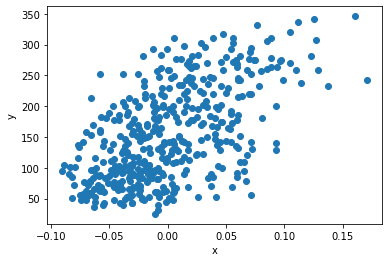

In [ ]:
plt.scatter(diabetes.data[:, 2], diabetes.target) # data의 3번째 특성, target
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
d_data = diabetes.data[:, 2]  # 데이터 - data의 3번째 특성
d_target = diabetes.target    # 타겟 - (n x 1) 크기

# **Linear Regression: 선형회귀**

##선형회귀식
$$ŷ = wx + b\\(w = weight, b = bias)$$



# **Gradient Descent: 경사하강법**
경사(변화율)을 감소시겨 모델이 더 정확한 표현을 하도록 하는 최적화 방법

In [ ]:
w = 1.0
b = 1.0
y_hat = d_data[0] * w + b   # y = wx + b
print(y_hat)  # 예측값
print("d_target: ", d_target[0], "y_hat: ", y_hat)  # 예측값과 타깃값 비교

1.0616962065186886
d_target:  151.0 y_hat:  1.0616962065186886


차이를 줄이기 위해 가중치 w를 0.1 증가시켜본다.

In [ ]:
w_inc = w + 0.1 # 0.1 증가
y_hat_inc = d_data[0] * w_inc + b # 다시 선형회귀식 계산
print(y_hat_inc)

1.0678658271705574


weight를 0.1만큼 증가시킨 결과 예측값 역시 증가하였다.<br>
가중치가 0.1 증가했을 때, 예측값이 얼마나 증가했는지 변화율을 보기 위해서는,<br>

<b>변화율 = (변화한 예측값 - 예측값) / (변화한 가중치 - 가중치)</b>

In [ ]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


####변화율
$$
w\_rate = \frac{y\_hat\_inc - y\_hat}{w\_inc - w} 
= \frac{(x[0] * w\_inc + b) - (x[0] * w + b)}{w\_inc - w} 
= \frac{x[0] * ((w + 0.1) - w)}{(w + 0.1) - w} 
= x[0]
$$
   
w_rate(변화율)에 대한 식을 정리하면,   
결국 **변화율 == x[0](훈련 데이터)** 라는 결론이 나온다.

##**변화율을 이용하여 가중치 업데이트**
가중치에 변화율 w_rate를 더해줌으로서 업데이트한다.



In [ ]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


##변화율을 이용하여 절편 업데이트
가중치와 마찬가지로 절편 b를 0.1 증가시켜 다시 회귀시켜본다.

In [ ]:
b_inc = b+ 0.1
y_hat_inc = d_data[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186887
1.0


변화율이 1이므로, b가 1 증가할 때, 예측값도 1 증가한다고 해석할 수 있다.
따라서 절편 b를 업데이트하기 위해서는   
단순히 기존 b에 1을 더하면 된다.

In [ ]:
b_new = b + 1
print(b_new)

2.0


#**Backpropagation: 오차 역전파**
오차 역전파는 y와 ŷ(타겟과 예측값)의 차이를 이용해 w와 b를 업데이트한다.    

타깃과 예측값의 오차량을 변화율에 곱하여 w와 b를 더 큰 폭으로 바꿀 수 있다.

In [ ]:
err = d_target[0] - y_hat  # 오차량
w_new = w + w_rate * err
b_new = b + b_rate * err
print(w_new, b_new) # 가중치와 절편이 큰 폭으로 업데이트 된다.

10.250624555904514 150.9383037934813


In [ ]:
'''
  다음 데이터값(x[1])을 이용해 오차율을 구하고, 가중치와 절편을 업데이트해보자.
  이전에, w_rate == x[n] 변화율이 데이터 샘플값과 같다는 사실을 확인했으므로,
  w_rate 대신 샘플값을 그대로 이용한다.
'''

y_hat = d_data[1] * w_new + b_new
err = d_target[1] - y_hat
w_new += d_data[1] * err
b_new += err

print(w_new, b_new)

14.132317616381767 75.52764127612664


In [ ]:
'''
  전체 데이터 샘플에 대해 오차 역전파를 이용한 경사하강법을 적용해보자.
  zip()함수는 여러 배열에서 요소를 하나씩 꺼내준다.
'''

for x_i, y_i in zip(d_data, d_target):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w += x_i * err
  b += err

print(w, b)

587.8654539985689 99.40935564531424


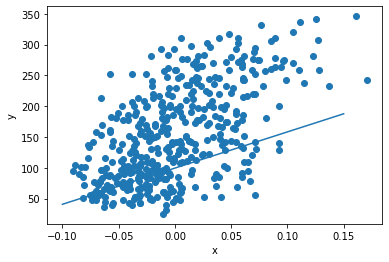

In [ ]:
'''
  위의 과정을 통해 얻어진 가중치와 절편으로
  선형호귀 직선을 plot해보자.

  위의 산점도 그래프에서 범위가 (-0.1 ~ 0.15)이므로, 시작점을 -0.1, 끝점을 0.15로 범위를 제한한다.
'''
plt.scatter(d_data, d_target)
pt1 = (-0.1, -0.1 * w + b)  # 시작점 (x, y)
pt2 = (0.15, 0.15 * w + b)  # 끝 점 (x, y)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])  # plot([x], [y])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

913.5973364345905 123.39414383177204


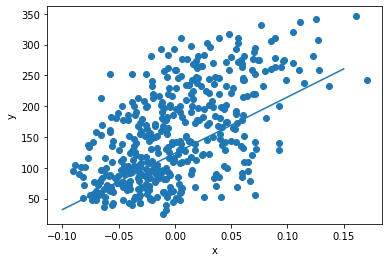

In [ ]:
'''
  에포크 반복하기
    전체 훈련 데이터를 이용해 작업을 진행하는 것을 epoch라고 한다.
    전체 샘플을 한 번 돌리면 1epoch
    이를 100에포크 진행해보자.
'''

for i in range(1, 100):
  for x_i, y_i in zip(d_data, d_target):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w += x_i * err
    b += err

print(w, b)


# plot
plt.scatter(d_data, d_target)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

오차 역전파를 이용한 경사하강법을 100에포크 진행한 결과,   
($w = 913.6, \quad b = 123.4$)   
라는 값을 얻었다.

따라서, 100에포크를 통한 선형회귀 식은
###$$ŷ = 913.6x + 123.4$$

In [ ]:
'''
  위에서 만든 모델을 통해 새로운 x 데이터값에 대한 예측을 해보자
'''

x_new = 0.08  # 0.08이라는 값을 가진 새로운 데이터
y_pred = x_new * w + b  # 예측
print(y_pred)

196.48193074653926


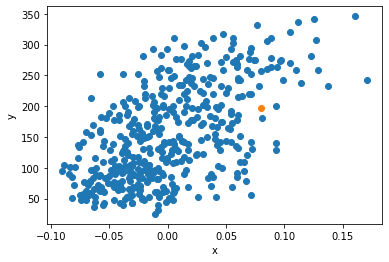

In [ ]:
plt.scatter(d_data, d_target)
plt.scatter(x_new, y_pred)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#**결론 및 요약**

###**Linear Regression: 선형회귀**
>$$y\_hat = wx + b$$

###**Gradient Descent: 경사하강법**
>모델을 최적화하기 위해 경사(변화율)을 감소시키는 방법   
 - 가중치 변화율(w_rate) = 데이터 샘플 값(x[n])
 - 절편 변화율(b_rate) = 1

##**Backpropagation: 오차역전파**
>타깃값과 예측값의 오차를 변화율에 곱하여 가중치를 업데이트하는 방법
 - w와 b가 더 큰 폭으로, 효율적으로 업데이트되게 하기 위함이다.
```
  err = y - y_hat
  w += w_rate * err
  //w += x[n] * err
```